# **CSST 106**

**Verdad, Jane Benneth Dione**

**BSCS-4B**

**October 2024**

**Machine Problem 5**

# **Object Detection and Recognition using YOLO**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 4.8 MB/s eta 0:00:00



0: 448x640 3 elephants, 3 giraffes, 163.7ms
Speed: 2.9ms preprocess, 163.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Inference Time for zoo1.jpeg: 0.2701 seconds
Number of Detected Objects in zoo1.jpeg: 6


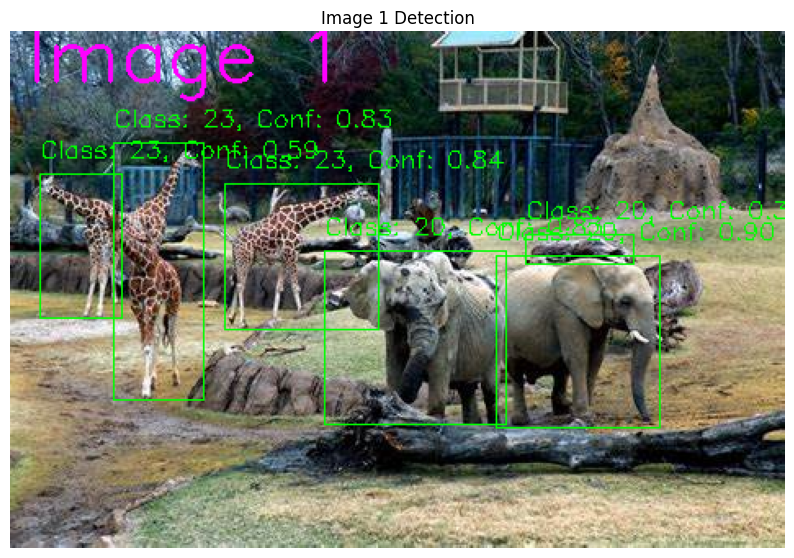


0: 448x640 1 elephant, 2 zebras, 4 giraffes, 423.1ms
Speed: 4.5ms preprocess, 423.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Inference Time for zoo2.jpeg: 0.4470 seconds
Number of Detected Objects in zoo2.jpeg: 7


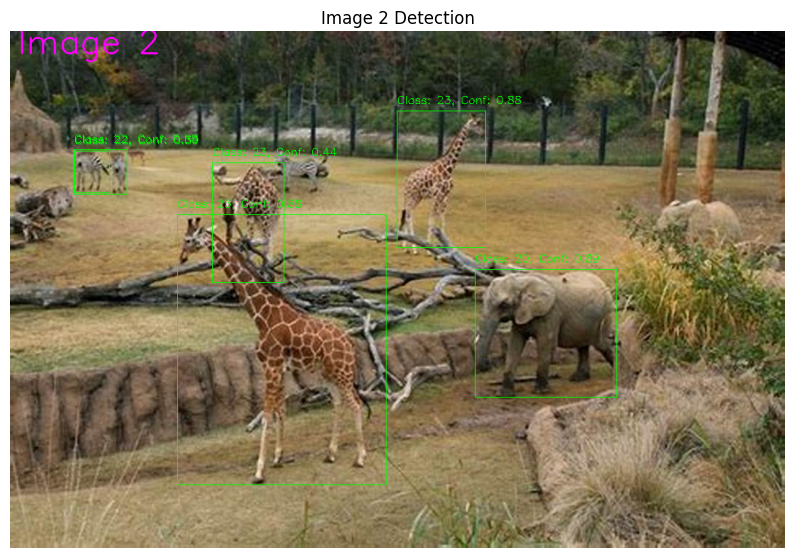

In [12]:
import cv2  # OpenCV for image processing
import time  # Time module to measure inference time
import matplotlib.pyplot as plt  # Matplotlib for displaying images
from ultralytics import YOLO  # Import the YOLO class from the ultralytics package

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')

# List of image paths to test and their corresponding labels
image_paths = ['zoo1.jpeg', 'zoo2.jpeg']
labels = ['Image 1', 'Image 2']

# Function to perform object detection, measure performance, and display images
def analyze_performance(image_path, label):
    # Load an image from the specified path
    image = cv2.imread(image_path)

    # Measure the inference time for object detection
    start_time = time.time()
    results = model.predict(image)
    end_time = time.time()

    # Calculate the time taken for inference
    inference_time = end_time - start_time
    print(f"Inference Time for {image_path}: {inference_time:.4f} seconds")

    # Initialize a counter for detected objects
    detected_objects = 0

    # Process the detection results (access the first result if it’s a list)
    result = results[0] if isinstance(results, list) else results
    boxes = result.boxes  # Get the bounding boxes from the detection results
    detected_objects += len(boxes)  # Count the number of detected boxes

    # Iterate through each detected box
    for box in boxes:
        # Get bounding box coordinates and confidence score
        x1, y1, x2, y2 = box.xyxy[0].numpy()
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        # Filter out low confidence detections
        if conf > 0.3:
            # Draw bounding box and label on the image
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 1)
            cv2.putText(image, f"Class: {class_id}, Conf: {conf:.2f}",
                        (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Display the number of detected objects
    print(f"Number of Detected Objects in {image_path}: {detected_objects}")

    # Adding a label to the top-left corner of the image
    cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255), 2)

    # Display the results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'{label} Detection')
    plt.show()

# Analyze performance for each image with corresponding labels
for img_path, label in zip(image_paths, labels):
    analyze_performance(img_path, label)
